In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl 
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

In [241]:
#подгружаем датасет, признаки - в X, целевые значения - в y 
X, y = skl.datasets.load_diabetes(return_X_y = True,as_frame = True) 
X_ = X[['s2']] #выбираем один столбец для обучения

X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.2,random_state = 0) # разделим данные на обучающую и тестовую выборки

Коэффициенты регрессии:  151.84219879760852 267.17602876963934


C:\Users\Denis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


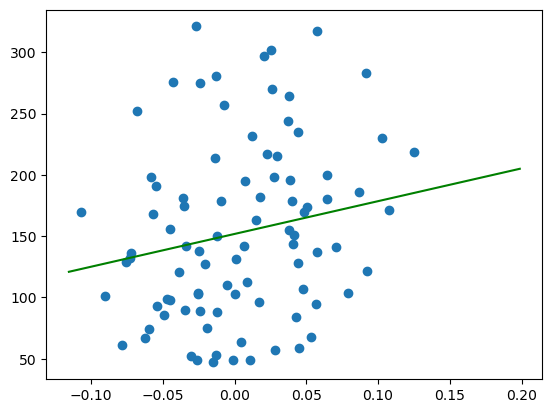

In [235]:
#Линейная регрессия из sklearn 
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("Коэффициенты регрессии: ", reg.intercept_, reg.coef_[0])
y_pred = reg.predict(X_test)

x_ = np.linspace(X_train.min(),X_train.max())
y_ = reg.predict(x_)

#отрисуем тестовые данные и прямую регрессии 
plt.scatter(X_test,y_test)
plt.plot(x_,y_,color="green")
#по всей видимости, данные не имеют каких-либо предпосылок к линейной зависимости 

Коэффициенты регрессии:  151.84219879760852 267.1760287696391


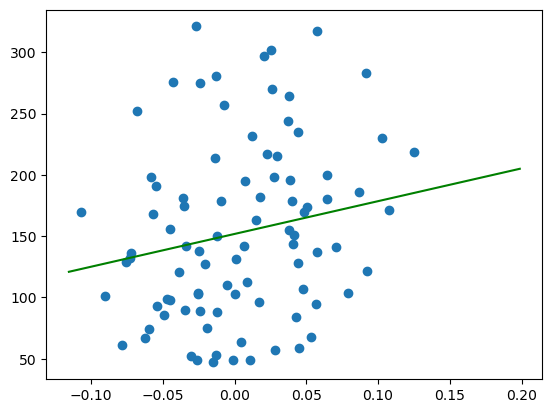

In [233]:
#собственная линейная регрессия 
X_mean = X_train.iloc[:,0].mean()
y_mean = y_train.mean()
cov = 0
S = 0

for i in X_train.index:
    cov += (X_train.iloc[:,0][i]-X_mean)*(y_train[i]-y_mean)
    S += (X_train.iloc[:,0][i]-X_mean)**2
    
b_1 = cov/S
b_0 = y_mean - b_1*X_mean

reg = lambda x: b_0 + x*b_1 # полученное уравнение регрессии
print("Коэффициенты регрессии: ", b_0, b_1)


#выведем регруссионную прямую 
x_ = np.linspace(X_train.min(),X_train.max())
y_ = reg(x_)

#отрисуем тестовые данные и прямую регрессии 
plt.scatter(X_test,y_test)
plt.plot(x_,y_,color="green")


In [243]:
#Сравнительная таблица
compare_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
compare_table

,Actual,Predicted
362,321.0,144.714235
249,215.0,159.690407
271,127.0,146.220219
435,64.0,153.080812
400,175.0,142.371594
...,...,...
381,104.0,144.965233
213,49.0,151.574828
134,103.0,151.909491
49,142.0,153.499141
